In [ ]:
# Mount your Google Drive here
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Remove directories if they exist (this is useful for cleaning up between runs)
!rm -r ./checkpoints ./checkpoints2 ./test_results ./runs
# Optional: remove data files and lists if needed for a fresh start
# !rm -r ./train ./val ./train_patch_gt.txt ./train_patch_noisy.txt ./val_gt.txt ./val_noisy.txt

rm: cannot remove './checkpoints': No such file or directory
rm: cannot remove './checkpoints2': No such file or directory
rm: cannot remove './test_results': No such file or directory
rm: cannot remove './runs': No such file or directory


# Prepare Training and Validation image data

In [ ]:
import pandas as pd
import glob
import os
import cv2
from zipfile import ZipFile

with ZipFile('/content/drive/MyDrive/SIDD_Small_sRGB_Only.zip', 'r') as zipObj:
   # Extract all contents of the zip file to the specified directory ('/content')
   zipObj.extractall('/content')

# Get lists of ground truth and noisy image paths
path_all_gt = glob.glob(os.path.join('./SIDD_Small_sRGB_Only/Data/', '**/*GT*.PNG'), recursive=True)
path_all_noisy = glob.glob(os.path.join('./SIDD_Small_sRGB_Only/Data/', '**/*NOISY*.PNG'), recursive=True)

print(len(path_all_gt))

# Create directories for training and validation data
%mkdir -p ./train/NOISY
%mkdir -p ./train/GT

%mkdir -p ./val/NOISY
%mkdir -p ./val/GT

# Process training data
sum = 0;M=120;N=160
for i in range(len(path_all_gt)):
        j=0
        imc = cv2.imread(path_all_gt[i])
        imn = cv2.imread(path_all_noisy[i])
        H, W, _ = imc.shape
        H = (H//M)*120 - 120
        W = (W//N)*160 - 160
        # print("\nH,w:",H,W)
        for x in range(0,H,M):
                for y in range(0,W,N):
                        img = imc[x:x+M,y:y+N]
                        cv2.imwrite(f"./train/GT/op_{i}_{j}.PNG",img)
                        img = imn[x:x+M,y:y+N]
                        cv2.imwrite(f"./train/NOISY/op_{i}_{j}.PNG",img)
                        j+=1
        sum = sum+j
        # print("\nj:",j)
        # os.remove(path_all_gt[i])
print("\nsum:",sum)

# Remove the original extracted dataset as it is not required now
!rm -r ./SIDD_Small_sRGB_Only/


# Process validation data
import scipy.io
import numpy as np
import cv2

# Load validation data from .mat files
mat_noisy = scipy.io.loadmat('./drive/MyDrive/ValidationNoisyBlocksSrgb.mat')
mat_clean = scipy.io.loadmat('./drive/MyDrive/ValidationGtBlocksSrgb.mat')
val_noisy = mat_noisy['ValidationNoisyBlocksSrgb']
val_gt = mat_clean['ValidationGtBlocksSrgb']

# Remove the .mat files
!rm ./ValidationNoisyBlocksSrgb.mat
!rm ./ValidationGtBlocksSrgb.mat

del mat_noisy, mat_clean

# Save validation images
shape_arr = val_gt.shape
for ii in range(shape_arr[0]):
      for jj in range(shape_arr[1]):
          im_noisy = val_noisy[ii, jj, ]
          cv2.imwrite(f"./val/NOISY/op_{ii}_{jj}.PNG",im_noisy)
          im_gt = val_gt[ii, jj, ]
          cv2.imwrite(f"./val/GT/op_{ii}_{jj}.PNG",im_gt)
# del val_noisy, val_gt

In [ ]:
import glob

# Get lists of training image paths
input_file = glob.glob('train/NOISY/*.PNG')
output_file = glob.glob('train/GT/*.PNG')

print('input_files',input_file)
print('output_files',output_file)

# Write training image paths to text files
with open('train_patch_noisy.txt', 'w+') as file:
        for input_path in input_file:
                file.write(input_path + '\n')

with open('train_patch_gt.txt', 'w+') as file1:
        for output_path in output_file:
                file1.write(output_path + '\n')

# Get lists of validation image paths
val_input = glob.glob('val/NOISY/*.PNG')
val_output = glob.glob('val/GT/*.PNG')

print('input_files',val_input)
print('output_files',val_output)

# Write validation image paths to text files
with open('val_noisy.txt', 'w+') as file:
        for input_path in val_input:
                file.write(input_path + '\n')

with open('val_gt.txt', 'w+') as file1:
        for output_path in val_output:
                file1.write(output_path + '\n')

input_files ['train/NOISY/op_1_118.PNG', 'train/NOISY/op_2_106.PNG', 'train/NOISY/op_2_155.PNG', 'train/NOISY/op_3_94.PNG', 'train/NOISY/op_3_47.PNG', 'train/NOISY/op_1_21.PNG', 'train/NOISY/op_3_3.PNG', 'train/NOISY/op_1_140.PNG', 'train/NOISY/op_3_24.PNG', 'train/NOISY/op_2_34.PNG', 'train/NOISY/op_2_63.PNG', 'train/NOISY/op_3_51.PNG', 'train/NOISY/op_2_130.PNG', 'train/NOISY/op_0_120.PNG', 'train/NOISY/op_0_42.PNG', 'train/NOISY/op_1_1.PNG', 'train/NOISY/op_3_64.PNG', 'train/NOISY/op_2_80.PNG', 'train/NOISY/op_3_112.PNG', 'train/NOISY/op_0_85.PNG', 'train/NOISY/op_1_35.PNG', 'train/NOISY/op_2_92.PNG', 'train/NOISY/op_2_117.PNG', 'train/NOISY/op_2_87.PNG', 'train/NOISY/op_1_67.PNG', 'train/NOISY/op_1_159.PNG', 'train/NOISY/op_2_45.PNG', 'train/NOISY/op_1_70.PNG', 'train/NOISY/op_1_22.PNG', 'train/NOISY/op_3_90.PNG', 'train/NOISY/op_0_60.PNG', 'train/NOISY/op_0_84.PNG', 'train/NOISY/op_2_161.PNG', 'train/NOISY/op_2_16.PNG', 'train/NOISY/op_3_35.PNG', 'train/NOISY/op_1_55.PNG', 'train/

In [1]:
import matplotlib.pyplot as plt
import cv2

# Display a ground truth and noisy training image
plt.imshow(cv2.imread('./train/GT/op_15_5.PNG'));plt.show()
plt.imshow(cv2.imread('./train/NOISY/op_15_5.PNG'));plt.show()

# Display a ground truth and noisy validation image
plt.imshow(cv2.imread('./val/GT/op_5_5.PNG'));plt.show()
plt.imshow(cv2.imread('./val/NOISY/op_5_5.PNG'))
plt.show()

# Loss Functions

In [ ]:
import torch
from torch import nn
from torchvision.models.vgg import vgg16
from skimage import measure
from torch.autograd import Variable
import tensorflow as tf
import cv2
import numpy as np
import gc
from torch.autograd import Variable
import torch.nn.functional as F


# Custom loss function combining multiple loss components
class CustomLoss_function(nn.Module):
    def __init__(self):
        super(CustomLoss_function, self).__init__()
        vgg = vgg16(pretrained=True)
        loss_network = nn.Sequential(*list(vgg.features)[:31]).eval()
        for param in loss_network.parameters():
            param.requires_grad = False
        self.loss_network = loss_network
        # Initialize MSE and L1 loss
        self.mse_loss = nn.MSELoss()
        self.mae_loss = nn.L1Loss()
        # Initialize Total Variation loss
        self.tv_loss = TVLoss()

    GPU=0 # Assuming GPU is set to 0
    def forward(self, out_images, target_images):
        # Calculate perceptual loss using VGG features
        perception_loss = self.mse_loss(self.loss_network(out_images), self.loss_network(target_images))
        # Calculate reconstruction loss (combination of MAE and MSE)
        recons_loss = 0.6*self.mae_loss(out_images, target_images) + 0.4*self.mse_loss(out_images, target_images)
        # Calculate Total Variation loss
        tv_loss = self.tv_loss(out_images)


        m=0; BATCH_SIZE = target_images.size()[0]
        # Calculate edge loss using Sobel filter
        for i in range(BATCH_SIZE):
          t_im= ((target_images[i,0,:,:]+1)*127.5).unsqueeze(0).reshape((1,1,120,160))
          o_im= ((out_images[i,0,:,:]+1)*127.5).unsqueeze(0).reshape((1,1,120,160))
          sobel_kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]], dtype='float32')
          sobel_kernel = sobel_kernel.reshape((1, 1, 3, 3))
          conv_op = nn.Conv2d(1, 1, 3, bias=False)
          conv_op.weight.data = torch.from_numpy(sobel_kernel).cuda() # Move kernel to GPU
          t_edge = conv_op(Variable(t_im))
          o_edge = conv_op(Variable(o_im))
          m=m+torch.mean(torch.abs(t_edge - o_edge))
        edge_loss=m/BATCH_SIZE

        print("loss:",recons_loss, perception_loss, perception_loss*0.006, tv_loss, tv_loss*2e-8, edge_loss,edge_loss*2e-4)

        # Combine all loss components
        loss = recons_loss + 0.006*perception_loss + 2e-8*tv_loss + edge_loss*2e-4

        return loss, recons_loss, perception_loss, tv_loss

# Total Variation Loss module
class TVLoss(nn.Module):
    def __init__(self, tv_loss_weight=1):
        super(TVLoss, self).__init__()
        self.tv_loss_weight = tv_loss_weight

    def forward(self, x):
        batch_size = x.size()[0]
        h_x = x.size()[2]
        w_x = x.size()[3]
        count_h = self.tensor_size(x[:, :, 1:, :])
        count_w = self.tensor_size(x[:, :, :, 1:])
        h_tv = torch.pow((x[:, :, 1:, :] - x[:, :, :h_x - 1, :]), 2).sum()
        w_tv = torch.pow((x[:, :, :, 1:] - x[:, :, :, :w_x - 1]), 2).sum()
        return self.tv_loss_weight * 2 * (h_tv / count_h + w_tv / count_w) / batch_size

    @staticmethod
    def tensor_size(t):
        return t.size()[1] * t.size()[2] * t.size()[3]


if __name__ == "__main__":
    g_loss = CustomLoss_function()
    print(g_loss)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

CustomLoss_function(
  (loss_network): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, p

# Encoder and Decoder Models

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Encoder module with residual blocks
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        # Convolutional layer 1
        self.layer1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        # Residual block 1
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1)
            )
        # Residual block 2
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1)
            )
        # Convolutional layer 2 with stride for downsampling
        self.layer5 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)
        # Residual block 3
        self.layer6 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1)
            )
        # Residual block 4
        self.layer7 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1)
            )
        # Convolutional layer 3 with stride for downsampling
        self.layer9 = nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1)
        # Residual block 5
        self.layer10 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1)
            )
        # Residual block 6
        self.layer11 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1)
            )

    def forward(self, x):
        # print("enc:",x.shape) # Uncomment to see shape progression
        # Convolutional layer 1
        x = self.layer1(x)
        # Apply residual blocks
        x = self.layer2(x) + x
        x = self.layer3(x) + x
        # Convolutional layer 2
        x = self.layer5(x)
        # Apply residual blocks
        x = self.layer6(x) + x
        x = self.layer7(x) + x
        # Convolutional layer 3
        x = self.layer9(x)
        # Apply residual blocks
        x = self.layer10(x) + x
        x = self.layer11(x) + x
        return x

# Decoder module with residual blocks and transposed convolutions for upsampling
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        # Deconvolutional block 3
        self.layer13 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1)
            )
        self.layer14 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1)
            )
        # Transposed convolution for upsampling
        self.layer16 = nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1)
        # Deconvolutional block 2
        self.layer17 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1)
            )
        self.layer18 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1)
            )
        # Transposed convolution for upsampling
        self.layer20 = nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1)
        # Deconvolutional block 1
        self.layer21 = nn.Sequential(
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1)
            )
        self.layer22 = nn.Sequential(
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1)
            )
        # Final convolutional layer
        self.layer24 = nn.Conv2d(32, 3, kernel_size=3, padding=1)

    def forward(self,x):
        # print("dec:",x.shape) # Uncomment to see shape progression
        # Apply deconvolutional blocks and upsampling
        x = self.layer13(x) + x
        x = self.layer14(x) + x
        x = self.layer16(x)
        # Apply deconvolutional blocks and upsampling
        x = self.layer17(x) + x
        x = self.layer18(x) + x
        x = self.layer20(x)
        # Apply deconvolutional blocks and final convolution
        x = self.layer21(x) + x
        x = self.layer22(x) + x
        x = self.layer24(x)
        return x

In [ ]:
!pip install tensorboardX

     |████████████████████████████████| 125 kB 26.1 MB/s 


# Prepare Datasets

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets
from PIL import Image
from skimage import io, transform
import os
import numpy as np
import random

class NH_NoiseDataset(Dataset):
    def __init__(self, noisy_image_files, denoised_image_files, root_dir, crop=False, crop_size=256, multi_scale=False, rotation=False, color_augment=False, transform=None):
        """
        Args:
             split_file: Path to the split file
             root_dir: Directory with all the images
             transform: Optional transform to be appeared on a sample
        """
        # Read noisy image file paths
        noisy_file = open(noisy_image_files, 'r')
        self.noisy_image_files = noisy_file.readlines()
        # Read denoised image file paths
        denoised_file = open(denoised_image_files, 'r')
        self.denoised_image_files = denoised_file.readlines()
        self.root_dir = root_dir
        self.transform = transform
        self.crop = crop
        self.crop_size = crop_size
        self.multi_scale = multi_scale
        self.rotation = rotation
        self.color_augment = color_augment
        seed = np.random.randint(2147483647) # make a seed with numpy generator
        random.seed(seed)
        self.rotate90 = transforms.RandomRotation(90)
        self.rotate45 = transforms.RandomRotation(45)

    def __len__(self):
        # Return the number of noisy images
        return len(self.noisy_image_files)

    def __getitem__(self, idx):
        image_name = self.noisy_image_files[idx][0:-1].split('/')
        # Open noisy and denoised images
        noisy_image = Image.open(os.path.join(self.root_dir, image_name[0],image_name[1], image_name[2])).convert('RGB')
        denoised_image = Image.open(os.path.join(self.root_dir,image_name[0], 'GT',image_name[2])).convert('RGB')  # change the filename

        if self.rotation:
            degree = random.choice([90, 180, 270], seed=0)
            noisy_image = transforms.functional.rotate(noisy_image, degree)
            denoised_image = transforms.functional.rotate(denoised_image, degree)

        if self.color_augment:
            #contrast_factor = 1 + (0.2 - 0.4*np.random.rand())
            #noisy_image = transforms.functional.adjust_contrast(noisy_image, contrast_factor)
            #denoised_image = transforms.functional.adjust_contrast(denoised_image, contrast_factor)
            noisy_image = transforms.functional.adjust_gamma(noisy_image, 1)
            denoised_image = transforms.functional.adjust_gamma(denoised_image, 1)
            random.seed(0)
            sat_factor = 1 + (0.2 - 0.4*np.random.rand())
            noisy_image = transforms.functional.adjust_saturation(noisy_image, sat_factor)
            denoised_image = transforms.functional.adjust_saturation(denoised_image, sat_factor)

        if self.transform:
            noisy_image = self.transform(noisy_image)
            denoised_image = self.transform(denoised_image)

        if self.crop:
            W = noisy_image.size()[1]
            H = noisy_image.size()[2]

            random.seed(0)
            Ws = np.random.randint(0, W-self.crop_size-1, 1)[0]
            Hs = np.random.randint(0, H-self.crop_size-1, 1)[0]

            noisy_image = noisy_image[:,Ws:Ws+self.crop_size,Hs:Hs+self.crop_size]
            denoised_image = denoised_image[:,Ws:Ws+self.crop_size,Hs:Hs+self.crop_size]

        # Return images based on multi_scale setting
        if self.multi_scale:
            H = denoised_image.size()[1]
            W = denoised_image.size()[2]
            noisy_image_s1 = transforms.ToPILImage()(noisy_image)
            denoised_image_s1 = transforms.ToPILImage()(denoised_image)
            noisy_image_s2 = transforms.ToTensor()(transforms.Resize([H//2, W//2])(noisy_image_s1))
            denoised_image_s2 = transforms.ToTensor()(transforms.Resize([H//2, W//2])(denoised_image_s1))
            noisy_image_s1 = transforms.ToTensor()(noisy_image_s1)
            denoised_image_s1 = transforms.ToTensor()(denoised_image_s1)
            return {'noisy_image_s1': noisy_image_s1, 'noisy_image_s2': noisy_image_s2,'denoised_image_s1': denoised_image_s1, 'denoised_image_s2': denoised_image_s2}
        elif self.multi_scale:
            H = denoised_image.size()[1]
            W = denoised_image.size()[2]
            noisy_image_s1 = transforms.ToPILImage()(noisy_image)
            denoised_image_s1 = transforms.ToPILImage()(denoised_image)
            noisy_image_s2 = transforms.ToTensor()(transforms.Resize([H//2, W//2])(noisy_image_s1))
            denoised_image_s2 = transforms.ToTensor()(transforms.Resize([H//2, W//2])(denoised_image_s1))
            noisy_image_s3 = transforms.ToTensor()(transforms.Resize([H//4, W//4])(noisy_image_s1))
            denoised_image_s3 = transforms.ToTensor()(transforms.Resize([H//4, W//4])(denoised_image_s1))
            noisy_image_s1 = transforms.ToTensor()(noisy_image_s1)
            denoised_image_s1 = transforms.ToTensor()(denoised_image_s1)
            return {'noisy_image_s1': noisy_image_s1, 'noisy_image_s2': noisy_image_s2, 'noisy_image_s3': noisy_image_s3, 'denoised_image_s1': denoised_image_s1, 'denoised_image_s2': denoised_image_s2, 'denoised_image_s3': denoised_image_s3}
        else:
            return {'noisy_image': noisy_image, 'denoised_image': denoised_image}

# Model Training

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.optim.lr_scheduler import StepLR
import numpy as np
import os
import math
import argparse
import random
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets
import time

#Hyper Parameters
METHOD = "DMPHN_1_2_4"
LEARNING_RATE = 0.0001
EPOCHS = 15
GPU = 0
BATCH_SIZE = 40  #8
IMAGE_SIZE = 60  #60
start_epoch = 0

def save_denoised_images(images, iteration, epoch):
    filename = './checkpoints/' + METHOD + "/epoch" + str(epoch) + "/" + "Iter_" + str(iteration) + "_denoised.png"
    torchvision.utils.save_image(images, filename)

def weight_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
        m.weight.data.normal_(0, 0.5*math.sqrt(2. / n))
        if m.bias is not None:
            m.bias.data.zero_()
    elif classname.find('BatchNorm') != -1:
        m.weight.data.fill_(1)
        m.bias.data.zero_()
    elif classname.find('Linear') != -1:
        n = m.weight.size(1)
        m.weight.data.normal_(0, 0.01)
        m.bias.data = torch.ones(m.bias.data.size())

def main():
    epch_id = 0
    print("init data folders")

    # Initialize encoder and decoder models for three levels
    encoder_lv1 = Encoder()
    encoder_lv2 = Encoder()
    encoder_lv3 = Encoder()

    decoder_lv1 = Decoder()
    decoder_lv2 = Decoder()
    decoder_lv3 = Decoder()

    # Move models to GPU and initialize weights
    encoder_lv1.apply(weight_init).cuda(GPU)
    encoder_lv2.apply(weight_init).cuda(GPU)
    encoder_lv3.apply(weight_init).cuda(GPU)

    decoder_lv1.apply(weight_init).cuda(GPU)
    decoder_lv2.apply(weight_init).cuda(GPU)
    decoder_lv3.apply(weight_init).cuda(GPU)

    # Initialize optimizers and learning rate schedulers
    encoder_lv1_optim = torch.optim.Adam(encoder_lv1.parameters(),lr=LEARNING_RATE)
    encoder_lv1_scheduler = StepLR(encoder_lv1_optim,step_size=10,gamma=0.1)
    encoder_lv2_optim = torch.optim.Adam(encoder_lv2.parameters(),lr=LEARNING_RATE)
    encoder_lv2_scheduler = StepLR(encoder_lv2_optim,step_size=10,gamma=0.1)
    encoder_lv3_optim = torch.optim.Adam(encoder_lv3.parameters(),lr=LEARNING_RATE)
    encoder_lv3_scheduler = StepLR(encoder_lv3_optim,step_size=10,gamma=0.1)

    decoder_lv1_optim = torch.optim.Adam(decoder_lv1.parameters(),lr=LEARNING_RATE)
    decoder_lv1_scheduler = StepLR(decoder_lv1_optim,step_size=10,gamma=0.1)
    decoder_lv2_optim = torch.optim.Adam(decoder_lv2.parameters(),lr=LEARNING_RATE)
    decoder_lv2_scheduler = StepLR(decoder_lv2_optim,step_size=10,gamma=0.1)
    decoder_lv3_optim = torch.optim.Adam(decoder_lv3.parameters(),lr=LEARNING_RATE)
    decoder_lv3_scheduler = StepLR(decoder_lv3_optim,step_size=10,gamma=0.1)

    # Load pre-trained weights if they exist
    if os.path.exists(str('./checkpoints/' + METHOD + "/encoder_lv1.pkl")):
        encoder_lv1.load_state_dict(torch.load(str('./checkpoints/' + METHOD + "/encoder_lv1.pkl")))
        print("load encoder_lv1 success")
    if os.path.exists(str('./checkpoints/' + METHOD + "/encoder_lv2.pkl")):
        encoder_lv2.load_state_dict(torch.load(str('./checkpoints/' + METHOD + "/encoder_lv2.pkl")))
        print("load encoder_lv2 success")
    if os.path.exists(str('./checkpoints/' + METHOD + "/encoder_lv3.pkl")):
        encoder_lv3.load_state_dict(torch.load(str('./checkpoints/' + METHOD + "/encoder_lv3.pkl")))
        print("load encoder_lv3 success")

    if os.path.exists(str('./checkpoints/' + METHOD + "/decoder_lv1.pkl")):
        decoder_lv1.load_state_dict(torch.load(str('./checkpoints/' + METHOD + "/decoder_lv1.pkl")))
        print("load encoder_lv1 success")
    if os.path.exists(str('./checkpoints/' + METHOD + "/decoder_lv2.pkl")):
        decoder_lv2.load_state_dict(torch.load(str('./checkpoints/' + METHOD + "/decoder_lv2.pkl")))
        print("load decoder_lv2 success")
    if os.path.exists(str('./checkpoints/' + METHOD + "/decoder_lv3.pkl")):
        decoder_lv3.load_state_dict(torch.load(str('./checkpoints/' + METHOD + "/decoder_lv3.pkl")))
        print("load decoder_lv3 success")

    # Create checkpoints directory if it doesn't exist
    if os.path.exists('./checkpoints/' + METHOD) == False:
        os.system('mkdir -p ./checkpoints/' + METHOD)

    # Training loop
    for epoch in range(start_epoch, EPOCHS):
        # Step learning rate schedulers
        encoder_lv1_scheduler.step(epoch)
        encoder_lv2_scheduler.step(epoch)
        encoder_lv3_scheduler.step(epoch)

        decoder_lv1_scheduler.step(epoch)
        decoder_lv2_scheduler.step(epoch)
        decoder_lv3_scheduler.step(epoch)

        print("Training...")

        # Load training dataset
        train_dataset = NH_NoiseDataset(
            noisy_image_files = './train_patch_noisy.txt',
            denoised_image_files = './train_patch_gt.txt',
            root_dir = './',
            crop = False,
            rotation = False,
            crop_size = IMAGE_SIZE,
            transform = transforms.Compose([
                transforms.ToTensor()
                ]))
        train_dataloader = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle=True)
        start = 0

        # Iterate over training data
        for iteration, images in enumerate(train_dataloader):
            # Initialize custom loss function
            custom_loss_fn = CustomLoss_function().cuda(GPU)

            # Get ground truth images
            gt = Variable(images['denoised_image'] - 0.5).cuda(GPU)
            H = gt.size(2)
            W = gt.size(3)

            # Prepare noisy images for different levels
            images_lv1 = Variable(images['noisy_image'] - 0.5).cuda(GPU)
            images_lv2_1 = images_lv1[:,:,0:int(H/2),:]
            images_lv2_2 = images_lv1[:,:,int(H/2):H,:]
            images_lv3_1 = images_lv2_1[:,:,:,0:int(W/2)]
            images_lv3_2 = images_lv2_1[:,:,:,int(W/2):W]
            images_lv3_3 = images_lv2_2[:,:,:,0:int(W/2)]
            images_lv3_4 = images_lv2_2[:,:,:,int(W/2):W]

            # Forward pass through the multi-level network
            feature_lv3_1 = encoder_lv3(images_lv3_1)
            feature_lv3_2 = encoder_lv3(images_lv3_2)
            feature_lv3_3 = encoder_lv3(images_lv3_3)
            feature_lv3_4 = encoder_lv3(images_lv3_4)
            feature_lv3_top = torch.cat((feature_lv3_1, feature_lv3_2), 3)
            feature_lv3_bot = torch.cat((feature_lv3_3, feature_lv3_4), 3)
            feature_lv3 = torch.cat((feature_lv3_top, feature_lv3_bot), 2)
            residual_lv3_top = decoder_lv3(feature_lv3_top)
            residual_lv3_bot = decoder_lv3(feature_lv3_bot)

            feature_lv2_1 = encoder_lv2(images_lv2_1 + residual_lv3_top)
            feature_lv2_2 = encoder_lv2(images_lv2_2 + residual_lv3_bot)
            feature_lv2 = torch.cat((feature_lv2_1, feature_lv2_2), 2) + feature_lv3
            residual_lv2 = decoder_lv2(feature_lv2)

            feature_lv1 = encoder_lv1(images_lv1 + residual_lv2) + feature_lv2
            denoised_image = decoder_lv1(feature_lv1)

            # Calculate loss
            loss_lv1, loss_recn, loss_perc, loss_tv = custom_loss_fn(denoised_image,gt)

            # loss_lv1 = 0.4*mse(denoised_image, gt) + 0.6*mae(denoised_image, gt)
            loss = loss_lv1

            # Backpropagate and update weights
            encoder_lv1.zero_grad()
            encoder_lv2.zero_grad()
            encoder_lv3.zero_grad()

            decoder_lv1.zero_grad()
            decoder_lv2.zero_grad()
            decoder_lv3.zero_grad()

            loss.backward()

            encoder_lv1_optim.step()
            encoder_lv2_optim.step()
            encoder_lv3_optim.step()

            decoder_lv1_optim.step()
            decoder_lv2_optim.step()
            decoder_lv3_optim.step()

            # Print training progress
            if (iteration+1)%10 == 0:
                stop = time.time()
                print("epoch:", epoch, "iteration:", iteration+1, "loss:%.4f"%loss.item(), 'time:%.4f'%(stop-start))
                start = time.time()

        # Perform testing and save checkpoints periodically
        if (epoch)%50==0:
            if os.path.exists('./checkpoints/' + METHOD + '/epoch' + str(epoch)) == False:
                os.system('mkdir ./checkpoints/' + METHOD + '/epoch' + str(epoch))

            print("Testing...")
            # Load test dataset
            test_dataset = NH_NoiseDataset(
                noisy_image_files = './val_noisy.txt',
                denoised_image_files = './val_gt.txt',
                root_dir = './',
                transform = transforms.Compose([
                    transforms.ToTensor()
                ]))
            test_dataloader = DataLoader(test_dataset, batch_size = 1, shuffle=False)
            test_time = 0.0
            # Iterate over test data
            for iteration, images in enumerate(test_dataloader):
                with torch.no_grad():
                    # Prepare noisy images for different levels
                    images_lv1 = Variable(images['noisy_image'] - 0.5).cuda(GPU)
                    start = time.time()
                    H = images_lv1.size(2)
                    W = images_lv1.size(3)
                    images_lv2_1 = images_lv1[:,:,0:int(H/2),:]
                    images_lv2_2 = images_lv1[:,:,int(H/2):H,:]
                    images_lv3_1 = images_lv2_1[:,:,:,0:int(W/2)]
                    images_lv3_2 = images_lv2_1[:,:,:,int(W/2):W]
                    images_lv3_3 = images_lv2_2[:,:,:,0:int(W/2)]
                    images_lv3_4 = images_lv2_2[:,:,:,int(W/2):W]

                    # Forward pass through the multi-level network
                    feature_lv3_1 = encoder_lv3(images_lv3_1)
                    feature_lv3_2 = encoder_lv3(images_lv3_2)
                    feature_lv3_3 = encoder_lv3(images_lv3_3)
                    feature_lv3_4 = encoder_lv3(images_lv3_4)
                    feature_lv3_top = torch.cat((feature_lv3_1, feature_lv3_2), 3)
                    feature_lv3_bot = torch.cat((feature_lv3_3, feature_lv3_4), 3)
                    feature_lv3 = torch.cat((feature_lv3_top, feature_lv3_bot), 2)
                    residual_lv3_top = decoder_lv3(feature_lv3_top)
                    residual_lv3_bot = decoder_lv3(feature_lv3_bot)

                    feature_lv2_1 = encoder_lv2(images_lv2_1 + residual_lv3_top)
                    feature_lv2_2 = encoder_lv2(images_lv2_2 + residual_lv3_bot)
                    feature_lv2 = torch.cat((feature_lv2_1, feature_lv2_2), 2) + feature_lv3
                    residual_lv2 = decoder_lv2(feature_lv2)

                    feature_lv1 = encoder_lv1(images_lv1 + residual_lv2) + feature_lv2
                    denoised_image = decoder_lv1(feature_lv1)

                    stop = time.time()
                    test_time += stop - start
                    print('RunTime:%.4f'%(stop-start), '  Average Runtime:%.4f'%(test_time/(iteration+1)))
                    # Save denoised images
                    save_denoised_images(denoised_image.data + 0.5, iteration, epoch)

        # Save model checkpoints
        torch.save(encoder_lv1.state_dict(),str('./checkpoints/' + METHOD + "/encoder_lv1.pkl"))
        torch.save(encoder_lv2.state_dict(),str('./checkpoints/' + METHOD + "/encoder_lv2.pkl"))
        torch.save(encoder_lv3.state_dict(),str('./checkpoints/' + METHOD + "/encoder_lv3.pkl"))

        torch.save(decoder_lv1.state_dict(),str('./checkpoints/' + METHOD + "/decoder_lv1.pkl"))
        torch.save(decoder_lv2.state_dict(),str('./checkpoints/' + METHOD + "/decoder_lv2.pkl"))
        torch.save(decoder_lv3.state_dict(),str('./checkpoints/' + METHOD + "/decoder_lv3.pkl"))

        epch_id += 1

if __name__ == '__main__':
    main()

In [ ]:
%rm -r ./checkpoints
%cp -r /content/drive/MyDrive/krishna_checkpt/DMPHN_epoch7/  ./checkpoints

In [ ]:
%rm -r ./checkpoints
%cp -r /content/drive/MyDrive/krishna_checkpt/DMPHN_epoch4/  ./checkpoints

# %rm -r /content/checkpoints/DMPHN_1_2_4/epoch0/
# %rm -r /content/drive/MyDrive/krishna_checkpt/DMPHN_epoch2/DMPHN_1_2_4/epoch0/

# Test the Model

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np
import os
import math
import argparse
import random
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets
import time
from PIL import Image

#Hyper Parameters
METHOD = "DMPHN_1_2_4"

SAMPLE_DIR = "./val/NOISY"       # store noisy images here

EXPDIR = 'DMPHN_results'

GPU = 0

def save_images(images, name):
    filename = './test_results/' + EXPDIR + "/" + name
    torchvision.utils.save_image(images, filename)


def main():
    print("init data folders")

    # Initialize encoder and decoder models for three levels
    encoder_lv1 = Encoder().cuda(GPU)
    encoder_lv2 = Encoder().cuda(GPU)
    encoder_lv3 = Encoder().cuda(GPU)

    decoder_lv1 = Decoder().cuda(GPU)
    decoder_lv2 = Decoder().cuda(GPU)
    decoder_lv3 = Decoder().cuda(GPU)

    # Load pre-trained weights
    encoder_lv1.load_state_dict(torch.load(str('./checkpoints/' + METHOD + "/encoder_lv1.pkl")))
    encoder_lv2.load_state_dict(torch.load(str('./checkpoints/' + METHOD + "/encoder_lv2.pkl")))
    encoder_lv3.load_state_dict(torch.load(str('./checkpoints/' + METHOD + "/encoder_lv3.pkl")))

    decoder_lv1.load_state_dict(torch.load(str('./checkpoints/' + METHOD + "/decoder_lv1.pkl")))
    decoder_lv2.load_state_dict(torch.load(str('./checkpoints/' + METHOD + "/decoder_lv2.pkl")))
    decoder_lv3.load_state_dict(torch.load(str('./checkpoints/' + METHOD + "/decoder_lv3.pkl")))

    # Create test results directory if it doesn't exist
    os.makedirs('./test_results/' + EXPDIR, exist_ok = True)

    iteration = 0.0
    test_time = 0.0

    # Iterate over noisy images in the sample directory
    for images_name in os.listdir(SAMPLE_DIR):
        # print (images_name )
        with torch.no_grad():
            # Load and preprocess the noisy image
            images_lv1 = transforms.ToTensor()(Image.open(SAMPLE_DIR + '/' + images_name).convert('RGB'))
            images_lv1 = Variable(images_lv1 - 0.5).unsqueeze(0).cuda(GPU)

            start = time.time()
            H = images_lv1.size(2)
            W = images_lv1.size(3)

            # Split image into sub-regions for multi-level processing
            images_lv2_1 = images_lv1[:,:,0:int(H/2),:]
            images_lv2_2 = images_lv1[:,:,int(H/2):H,:]
            images_lv3_1 = images_lv2_1[:,:,:,0:int(W/2)]
            images_lv3_2 = images_lv2_1[:,:,:,int(W/2):W]
            images_lv3_3 = images_lv2_2[:,:,:,0:int(W/2)]
            images_lv3_4 = images_lv2_2[:,:,:,int(W/2):W]

            # Forward pass through the multi-level network
            feature_lv3_1 = encoder_lv3(images_lv3_1)
            feature_lv3_2 = encoder_lv3(images_lv3_2)
            feature_lv3_3 = encoder_lv3(images_lv3_3)
            feature_lv3_4 = encoder_lv3(images_lv3_4)
            feature_lv3_top = torch.cat((feature_lv3_1, feature_lv3_2), 3)
            feature_lv3_bot = torch.cat((feature_lv3_3, feature_lv3_4), 3)
            feature_lv3 = torch.cat((feature_lv3_top, feature_lv3_bot), 2)
            residual_lv3_top = decoder_lv3(feature_lv3_top)
            residual_lv3_bot = decoder_lv3(feature_lv3_bot)

            feature_lv2_1 = encoder_lv2(images_lv2_1 + residual_lv3_top)
            feature_lv2_2 = encoder_lv2(images_lv2_2 + residual_lv3_bot)
            feature_lv2 = torch.cat((feature_lv2_1, feature_lv2_2), 2) + feature_lv3
            residual_lv2 = decoder_lv2(feature_lv2)

            feature_lv1 = encoder_lv1(images_lv1 + residual_lv2) + feature_lv2
            denoised_image = decoder_lv1(feature_lv1)

            stop = time.time()
            test_time += stop-start
            print('RunTime:%.4f'%(stop-start), '  Average Runtime:%.4f'%(test_time/(iteration+1)))
            # Save denoised images
            save_images(denoised_image.data + 0.5, images_name)

if __name__ == '__main__':
    main()

init data folders
RunTime:0.0181   Average Runtime:0.0181
RunTime:0.0196   Average Runtime:0.0377
RunTime:0.0155   Average Runtime:0.0531
RunTime:0.0176   Average Runtime:0.0707
RunTime:0.0155   Average Runtime:0.0862
RunTime:0.0155   Average Runtime:0.1017
RunTime:0.0161   Average Runtime:0.1178
RunTime:0.0157   Average Runtime:0.1335
RunTime:0.0173   Average Runtime:0.1508
RunTime:0.0160   Average Runtime:0.1668
RunTime:0.0158   Average Runtime:0.1826
RunTime:0.0168   Average Runtime:0.1994
RunTime:0.0161   Average Runtime:0.2156
RunTime:0.0154   Average Runtime:0.2310
RunTime:0.0156   Average Runtime:0.2466
RunTime:0.0155   Average Runtime:0.2621
RunTime:0.0188   Average Runtime:0.2809
RunTime:0.0161   Average Runtime:0.2969
RunTime:0.0165   Average Runtime:0.3135
RunTime:0.0210   Average Runtime:0.3345
RunTime:0.0155   Average Runtime:0.3500
RunTime:0.0154   Average Runtime:0.3654
RunTime:0.0161   Average Runtime:0.3815
RunTime:0.0155   Average Runtime:0.3970
RunTime:0.0152   Avera

# Calculate PSNR and SSIM

In [ ]:
import os
import cv2
from skimage.metrics import structural_similarity
import glob

# Get lists of ground truth and predicted image paths
GT = glob.glob('./val/GT/*PNG')
pre = glob.glob('./test_results/DMPHN_results/*PNG')
print(len(GT),len(pre))
val_PSNR=0
val_SSIM=0
# Iterate through the images and calculate PSNR and SSIM
for i in range(len(GT)):
  # Read ground truth and predicted images
  img1 = cv2.imread(GT[i])
  img2 = cv2.imread(pre[i])
  # Calculate PSNR
  psnr = cv2.PSNR(img1, img2)

  # Convert images to grayscale for SSIM calculation
  grayA = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
  grayB = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
  # Calculate SSIM
  (score, diff) = structural_similarity(grayA, grayB, full=True)
  print("PSNR:- ",psnr,"  SSIM:- ",score)
  val_PSNR+=psnr
  val_SSIM+=score

# Print average PSNR and SSIM
print("Avg PSNR for NTIRE2021: ",val_PSNR/1280)
print("Avg SSIM for NTIRE2021: ",val_SSIM/1280)

1280 1280
PSNR:-  37.97498676900882   SSIM:-  0.9742747961905016
PSNR:-  32.90472736640311   SSIM:-  0.8250765324100354
PSNR:-  31.41703872808918   SSIM:-  0.7824878001487693
PSNR:-  34.81404807662254   SSIM:-  0.9006594186511336
PSNR:-  38.82113264967915   SSIM:-  0.9827358354945859
PSNR:-  39.826438189104515   SSIM:-  0.9682548896428275
PSNR:-  43.57701654132893   SSIM:-  0.9761580745112945
PSNR:-  46.71074451326941   SSIM:-  0.9909368176609198
PSNR:-  35.46593584263107   SSIM:-  0.9311861490017594
PSNR:-  37.6519261457085   SSIM:-  0.9406860686768225
PSNR:-  32.45218468254339   SSIM:-  0.8343173407814258
PSNR:-  36.278682510355374   SSIM:-  0.9336717967273194
PSNR:-  36.14765989904967   SSIM:-  0.974583975716326
PSNR:-  40.76939927454289   SSIM:-  0.9657203429799317
PSNR:-  39.04180696367041   SSIM:-  0.9456779120013269
PSNR:-  45.127013845493735   SSIM:-  0.9877764882034964
PSNR:-  30.55858479025598   SSIM:-  0.72839278262075
PSNR:-  42.74045557095605   SSIM:-  0.9813565488863129
P

# Print the Results -- Noisy, Predicted and Ground Truth images

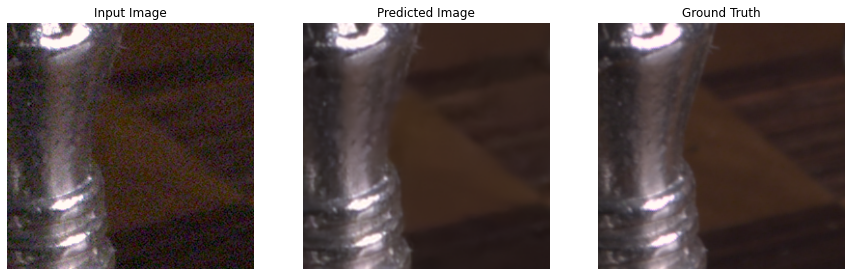

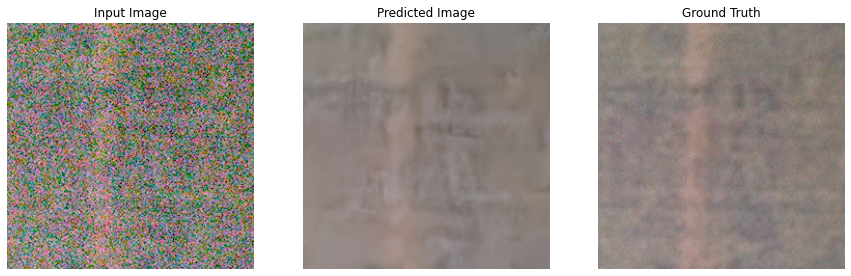

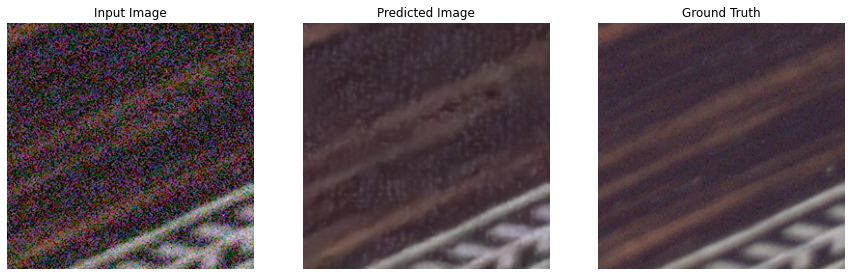

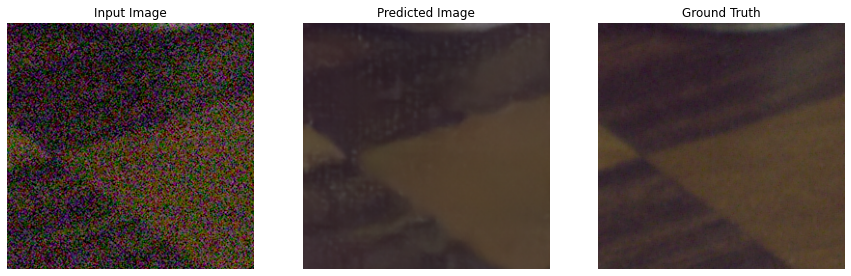

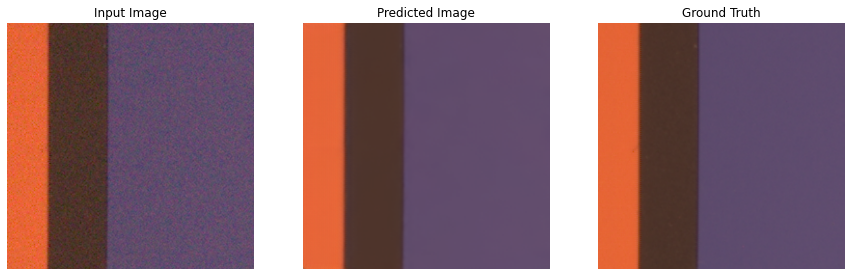

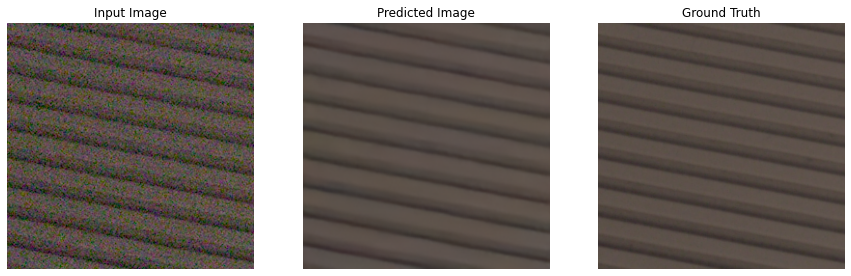

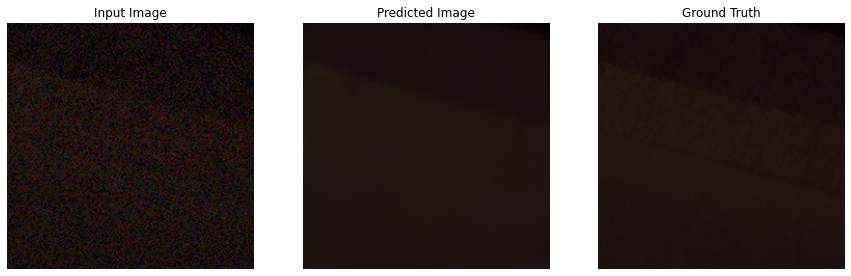

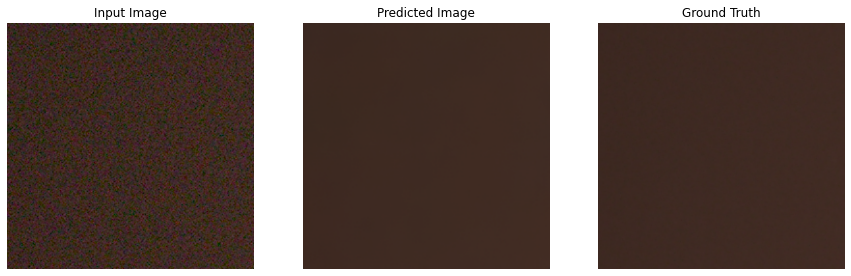

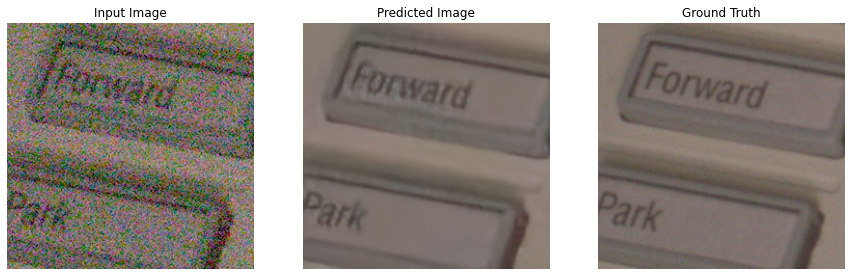

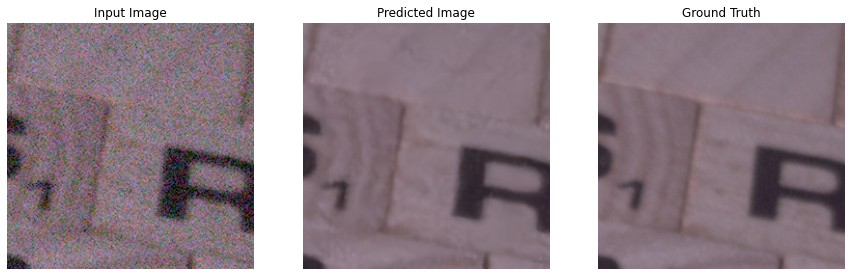

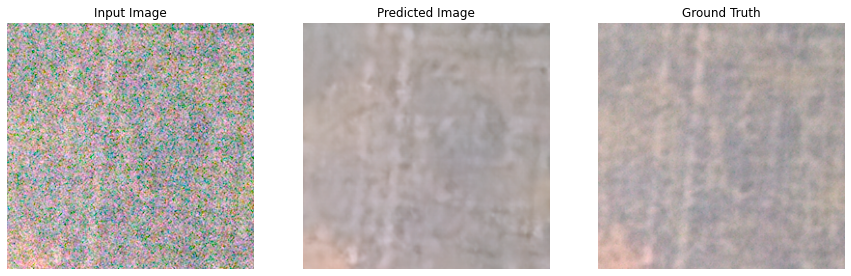

In [ ]:
import matplotlib.pyplot as plt

GT = glob.glob('./val/GT/*PNG')
NOISY = glob.glob('./val/NOISY/*PNG')
pre = glob.glob('./test_results/DMPHN_results/*PNG')

title = ['Input Image', 'Predicted Image', 'Ground Truth']
# Iterate through a few images to display
for i in range(100):
  l=[NOISY[i],pre[i],GT[i]]
  plt.figure(figsize=(15, 15))
  for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(title[i])
    # Getting the pixel values in the [0, 1] range to plot.
    plt.imshow(cv2.imread(l[i]))
    plt.axis('off')
  plt.show()

In [ ]:
# # %mkdir /content/drive/MyDrive/haze_checkpoint_DMPHN
# %mkdir /content/drive/MyDrive/DMPHN_epoch6
# !cp -r /content/checkpoints/* /content/drive/MyDrive/DMPHN_epoch6